<a href="https://colab.research.google.com/github/wcj365/python-stats-dataviz/blob/master/assignments/Assignment-04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# <1> 
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
import sys

In [3]:
# <2>
# load the 2017-2018 school year file "MERGED2017_18_PP.csv" 
# Don't include all columns - too many and take up computer resources (computeing power and memory)
# Only load the following 10 columns should be loaded:
# UNITID: 
# OPEID:              
# OPEID6:            
# INSTNM:          
# CITY:                      
# ZIP:               
# ADM_RATE:           
# UGDS:              
# TUITIONFEE_IN:      

data=pd.read_csv('HomeWorks/CollegeScorecard_Raw_Data/MERGED2017_18_PP.csv', 
                 usecols = ['UNITID','OPEID','OPEID6','INSTNM','CITY','ZIP',
                            'ADM_RATE','UGDS','TUITIONFEE_IN'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Data columns (total 9 columns):
UNITID           7112 non-null int64
OPEID            7112 non-null int64
OPEID6           7112 non-null int64
INSTNM           7112 non-null object
CITY             7112 non-null object
ZIP              7112 non-null object
ADM_RATE         2037 non-null float64
UGDS             6364 non-null float64
TUITIONFEE_IN    4021 non-null float64
dtypes: float64(3), int64(3), object(3)
memory usage: 500.2+ KB


In [8]:
data.head(5)

,UNITID,OPEID,OPEID6,INSTNM,CITY,ZIP,ADM_RATE,UGDS,TUITIONFEE_IN
0,100654,100200,1002,Alabama A & M University,Normal,35762,0.9027,4824.0,9857.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,35294-0110,0.9181,12866.0,8328.0
2,100690,2503400,25034,Amridge University,Montgomery,36117-3553,NaN,322.0,6900.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,35899,0.8123,6917.0,10280.0
4,100724,100500,1005,Alabama State University,Montgomery,36104-0271,0.9787,4189.0,11068.0


In [9]:
data.tail(5)

,UNITID,OPEID,OPEID6,INSTNM,CITY,ZIP,ADM_RATE,UGDS,TUITIONFEE_IN
7107,48312404,108163,1081,Arizona State University at Yuma,Yuma,853656900,NaN,NaN,NaN
7108,48387801,4223701,42237,Bay Area Medical Academy - San Jose Satellite ...,San Jose,95113,NaN,NaN,NaN
7109,48400201,4228101,42281,High Desert Medical College,Lancaster,935340000,NaN,NaN,NaN
7110,48778201,4221501,42215,BCI - Malden,Malden,021480000,NaN,NaN,NaN
7111,49005401,4182601,41826,Health Career Institute- Lauderdale Lakes,Lauderdale Lakes,333137268,NaN,NaN,22575.0


In [12]:
len(data['UNITID'].unique())

7112

In [4]:
# <3>
# Load the scorecard file Most-Recent-Cohorts-Scorecard-Elements.csv from the link:
# https://ed-public-download.app.cloud.gov/downloads/Most-Recent-Cohorts-Scorecard-Elements.csv
# This file has thre median earnings which is not present in the previous file
# Only load the two columns:
# UNITID - This column is the unique identity for each college and will be used to join with the previous file
# MD_EARN_WNE_P10  - This column has the median earnings
data2 = pd.read_csv("HomeWorks/Most-Recent-Cohorts-Scorecard-Elements.csv", 
                    usecols = ["UNITID","MD_EARN_WNE_P10"])
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Data columns (total 2 columns):
UNITID             7112 non-null int64
MD_EARN_WNE_P10    5887 non-null object
dtypes: int64(1), object(1)
memory usage: 111.2+ KB


In [5]:
# <4> 
# Explore this file - number of colleges, head/tail/sample etc.
# Notice this file has different number of colleges from the previous file
# This indicate they are not identical and they overlap (they don't contain the same set of colleges)
data2.head(5)

,UNITID,MD_EARN_WNE_P10
0,100654,31000
1,100663,41200
2,100690,39600
3,100706,46700
4,100724,27700


In [7]:
data2.tail(5)

,UNITID,MD_EARN_WNE_P10
7107,48312404,NaN
7108,48387801,NaN
7109,48400201,NaN
7110,48778201,NaN
7111,49005401,NaN


Unfortunately observing the head and tail of the new file I could not differentiate on the number of colleges in both the files

In [11]:
len(data2['UNITID'].unique())

7112

In [37]:
# <5>
#Join the two files together to produce a third file which contain all the columns and all colleges that are common to both files
new_data = pd.merge(data, data2, how="inner", on="UNITID")
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7112 entries, 0 to 7111
Data columns (total 10 columns):
UNITID             7112 non-null int64
OPEID              7112 non-null int64
OPEID6             7112 non-null int64
INSTNM             7112 non-null object
CITY               7112 non-null object
ZIP                7112 non-null object
ADM_RATE           2037 non-null float64
UGDS               6364 non-null float64
TUITIONFEE_IN      4021 non-null float64
MD_EARN_WNE_P10    5887 non-null object
dtypes: float64(3), int64(3), object(4)
memory usage: 611.2+ KB


In [38]:
# <6>
# Explore the new file - number of colleges, head/tail/sample etc.
len(new_data['UNITID'].unique())

7112

In [39]:
new_data.head(5)

,UNITID,OPEID,OPEID6,INSTNM,CITY,ZIP,ADM_RATE,UGDS,TUITIONFEE_IN,MD_EARN_WNE_P10
0,100654,100200,1002,Alabama A & M University,Normal,35762,0.9027,4824.0,9857.0,31000
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,35294-0110,0.9181,12866.0,8328.0,41200
2,100690,2503400,25034,Amridge University,Montgomery,36117-3553,NaN,322.0,6900.0,39600
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,35899,0.8123,6917.0,10280.0,46700
4,100724,100500,1005,Alabama State University,Montgomery,36104-0271,0.9787,4189.0,11068.0,27700


In [40]:
new_data.tail(5)

,UNITID,OPEID,OPEID6,INSTNM,CITY,ZIP,ADM_RATE,UGDS,TUITIONFEE_IN,MD_EARN_WNE_P10
7107,48312404,108163,1081,Arizona State University at Yuma,Yuma,853656900,NaN,NaN,NaN,NaN
7108,48387801,4223701,42237,Bay Area Medical Academy - San Jose Satellite ...,San Jose,95113,NaN,NaN,NaN,NaN
7109,48400201,4228101,42281,High Desert Medical College,Lancaster,935340000,NaN,NaN,NaN,NaN
7110,48778201,4221501,42215,BCI - Malden,Malden,021480000,NaN,NaN,NaN,NaN
7111,49005401,4182601,41826,Health Career Institute- Lauderdale Lakes,Lauderdale Lakes,333137268,NaN,NaN,22575.0,NaN


In [41]:
# <7>
# Find out the top 100 colleges that are hardest to get in (Top 100) from this new file
top_100 = new_data.nsmallest(100,"ADM_RATE")
# Eliminating Admission rate zero values
top_100 = top_100[new_data.ADM_RATE!=0]
top_100.dropna(inplace = True)
top_100.head(100)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,UNITID,OPEID,OPEID6,INSTNM,CITY,ZIP,ADM_RATE,UGDS,TUITIONFEE_IN,MD_EARN_WNE_P10
2978,211893,325100,3251,Curtis Institute of Music,Philadelphia,19103,0.0330,131.0,2675.0,PrivacySuppressed
3979,243744,130500,1305,Stanford University,Stanford,94305,0.0473,7056.0,49617.0,94000
1557,166027,215500,2155,Harvard University,Cambridge,02138,0.0516,7532.0,48949.0,89700
2302,192110,274200,2742,The Juilliard School,New York,10023-6588,0.0592,486.0,43170.0,32800
2123,186131,262700,2627,Princeton University,Princeton,08544-0070,0.0641,5246.0,47140.0,74700
...,...,...,...,...,...,...,...,...,...,...
1211,154262,729100,7291,St Luke's College,Sioux City,51104-0263,0.2667,274.0,20440.0,44400
3128,215594,656500,6565,Reading Hospital School of Health Sciences,Reading,19611,0.2679,288.0,10095.0,63800
691,133979,148600,1486,Florida Memorial University,Miami Gardens,33054-6199,0.2733,1173.0,15536.0,27600
3707,234076,374500,3745,University of Virginia-Main Campus,Charlottesville,22903-2628,0.2735,16207.0,16853.0,61200


#### I have got top 80 colleges

In [42]:
# <8>
# Display the summary statistics of the in-state tuitions of the top 100 colleges that are hardest to get in
top_100.TUITIONFEE_IN.describe()

count       80.000000
mean     40134.237500
std      17865.622798
min       1020.000000
25%      19313.750000
50%      50455.000000
75%      52787.500000
max      57208.000000
Name: TUITIONFEE_IN, dtype: float64

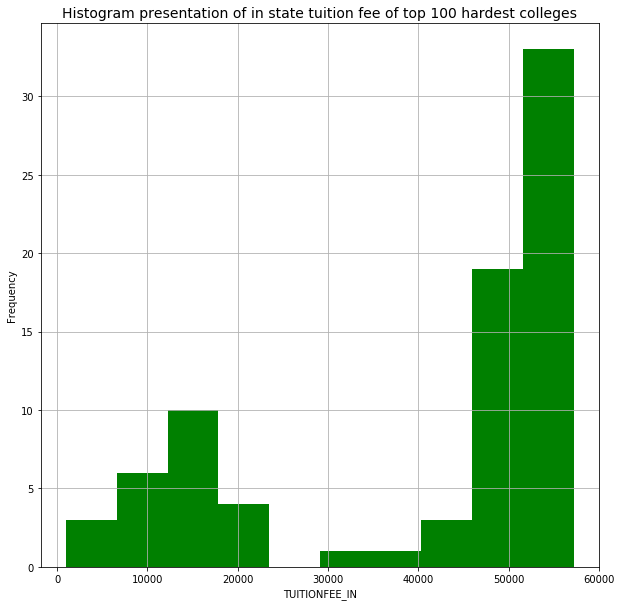

In [44]:
# <9>
# Display the histogram of the in-state tuitions of the top 100 colleges that are hardest to get in
tuition = top_100.TUITIONFEE_IN
fig, ax = plt.subplots(figsize=(10,10)) 
ax.hist(tuition, color='green')
ax.set_title('Histogram presentation of in state tuition fee of top 100 hardest colleges', fontsize=14)
ax.set_xlabel('TUITIONFEE_IN', fontsize=10)
ax.set_ylabel('Frequency', fontsize=10)
ax.grid(True)

In [45]:
# <10>
# Display the summary statistics of the earning potentials of the top 100 colleges that are hardest to get in
earning_potential=top_100.MD_EARN_WNE_P10
earning_potential.describe()

count        80
unique       74
top       69000
freq          2
Name: MD_EARN_WNE_P10, dtype: object

In [48]:
top_100.head(5)

,UNITID,OPEID,OPEID6,INSTNM,CITY,ZIP,ADM_RATE,UGDS,TUITIONFEE_IN,MD_EARN_WNE_P10
2978,211893,325100,3251,Curtis Institute of Music,Philadelphia,19103,0.0330,131.0,2675.0,PrivacySuppressed
3979,243744,130500,1305,Stanford University,Stanford,94305,0.0473,7056.0,49617.0,94000
1557,166027,215500,2155,Harvard University,Cambridge,02138,0.0516,7532.0,48949.0,89700
2302,192110,274200,2742,The Juilliard School,New York,10023-6588,0.0592,486.0,43170.0,32800
2123,186131,262700,2627,Princeton University,Princeton,08544-0070,0.0641,5246.0,47140.0,74700


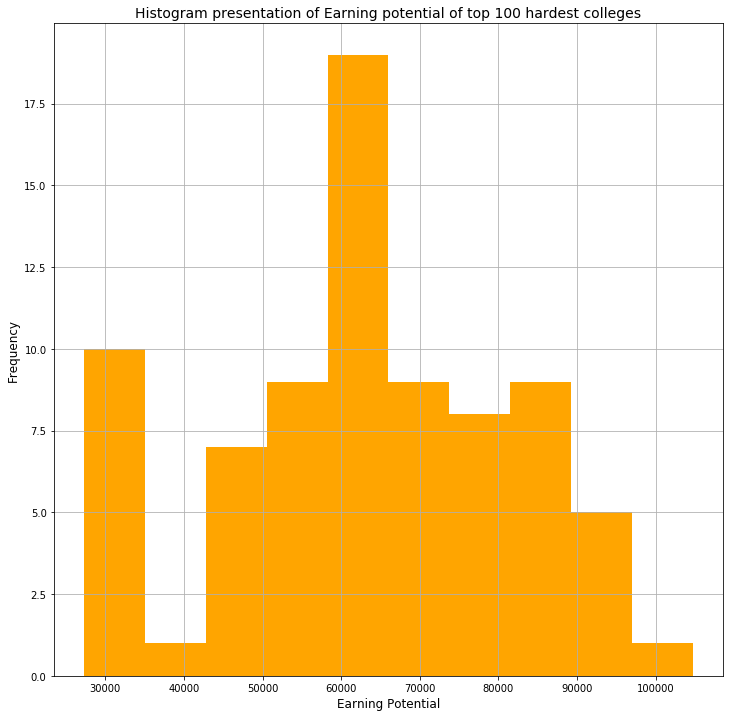

In [64]:
# <11>
# Display the histogram of the earning potentials of the top 100 colleges that are hardest to get in
#df=pd.DataFrame(earning_potential)
top_100['MD_EARN_WNE_P10'].replace({'PrivacySuppressed':None}, inplace=True)
top_100.MD_EARN_WNE_P10.dropna(inplace=True)

earnings=top_100.MD_EARN_WNE_P10.astype(int)
fig, ax=plt.subplots(figsize=(12,12)) 
ax.hist(earnings, color='orange')
ax.set_title('Histogram presentation of Earning potential of top 100 hardest colleges', fontsize=14)
ax.set_xlabel('Earning Potential', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.grid(True)

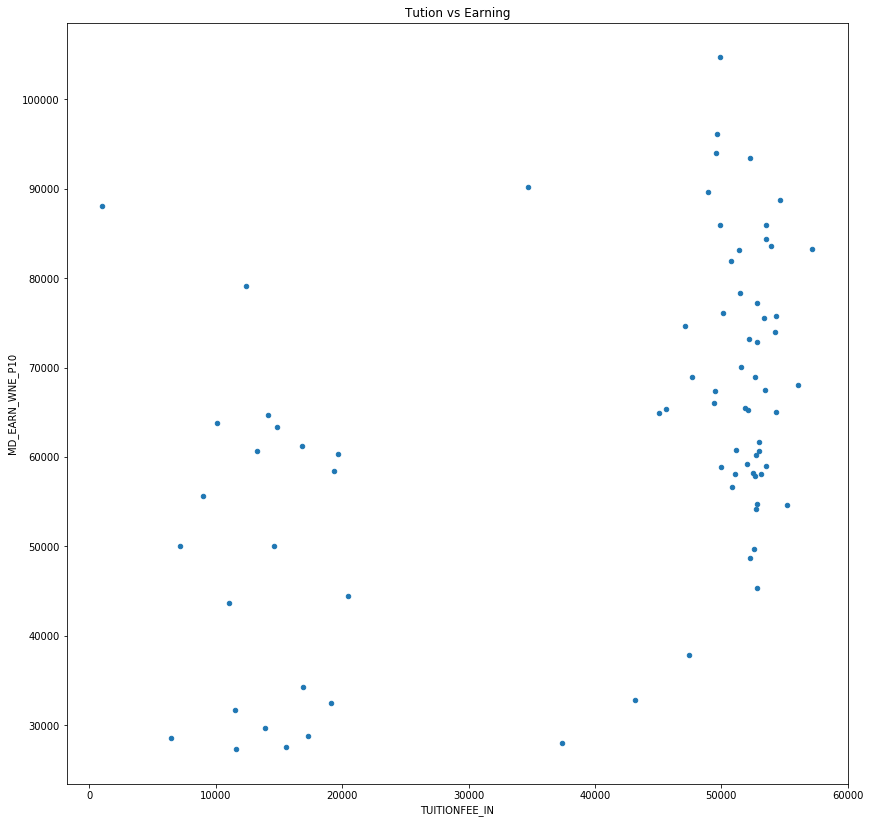

In [65]:
# <12>
# Make a scatter plot of the in-state tuition and the median graduate earnings of 
# the top 100 colleges that are hardest to get in
# using Pandas
top_100['MD_EARN_WNE_P10'].replace({'PrivacySuppressed':None}, inplace=True)
top_100.MD_EARN_WNE_P10 = top_100.MD_EARN_WNE_P10.astype(float)
fig, ax = plt.subplots(figsize=(14,14))
ax.set_title("Tution vs Earning")
ax.grid(True)

top_100.plot.scatter(x='TUITIONFEE_IN',y='MD_EARN_WNE_P10',ax=ax)

C:\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


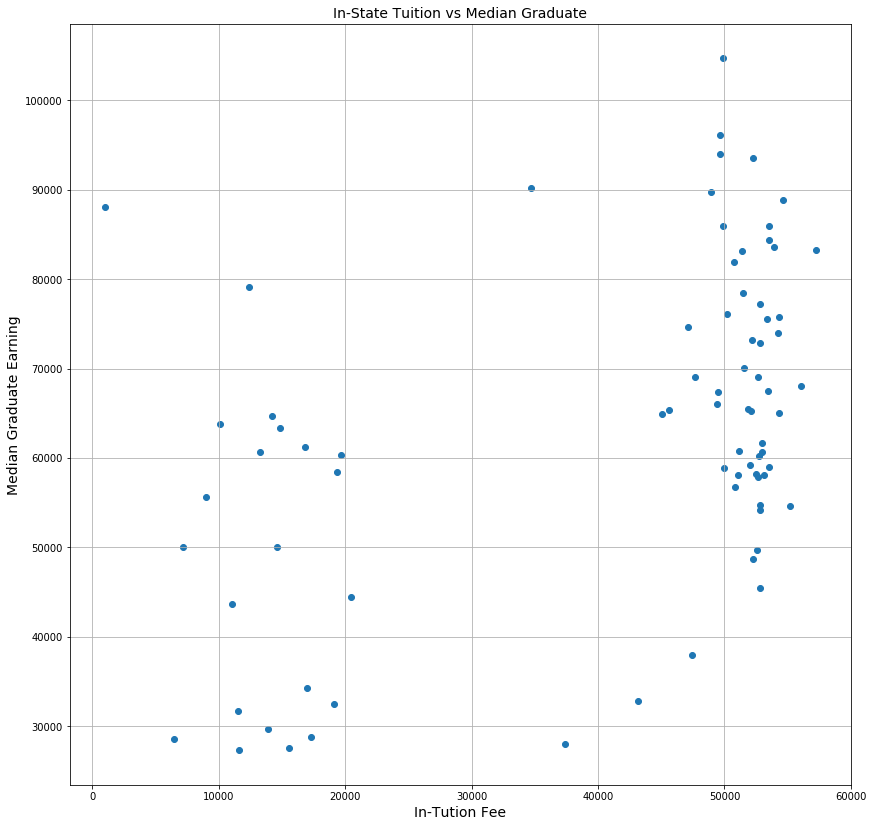

In [66]:
# <13>
# Make a scatter plot of the in-state tuition and the median graduate earnings of 
# the top 100 colleges that are hardest to get in
# using Matplotlib
top_100.MD_EARN_WNE_P10 = top_100.MD_EARN_WNE_P10[top_100.MD_EARN_WNE_P10!='PrivacySuppressed']
fig, ax = plt.subplots(figsize=(14,14)) 
ax.scatter(top_100.TUITIONFEE_IN, top_100.MD_EARN_WNE_P10)
ax.set_title('In-State Tuition vs Median Graduate', fontsize=14)
ax.set_xlabel('In-Tution Fee', fontsize=14)
ax.set_ylabel('Median Graduate Earning', fontsize=14)
ax.grid(True)

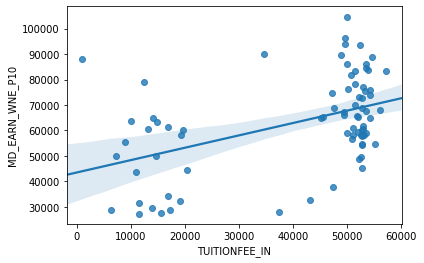

In [67]:
# <14>
# Make a scatter plot of the in-state tuition and the median graduate earnings of 
# the top 100 colleges that are hardest to get in
# using Seaborn
sns.regplot(x=top_100["TUITIONFEE_IN"], y=top_100["MD_EARN_WNE_P10"])

In [68]:
# <15> 
# Your observation/conclusion of the scatter plot (use the following Markdown cell)

 Based on my observation of the scatter plot, I feel that there is a positve correlation between the two variables since as there is a increase in the tuition fee there is a likely increase in the median graduate earnings

